# Imports and Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pdb
import seaborn as sns

sns.set_theme(font='monospace')

gender_colors = ['#f7d131', '#5b8d96', '#C4C4C4']

gender_palette = sns.color_palette(gender_colors)
archetype_palette = sns.color_palette("Blues_d",n_colors=13)

sns.set_palette(gender_palette)

from collections import Counter, OrderedDict

In [5]:
# from google drive
'''
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# For this to run, make sure to create a shortcut to the short folder in your personal drive
# Just click on Folder and then "add to drive"
root_path = '/content/drive/My Drive/project_folder/'
'''

# from locally
root_path = 'data/'

In [3]:
archetypes = ['Hero', 'Magician', 'Outlaw', 'Explorer', 'Sage', 'Innocent', 'Creator', 'Ruler', 'Caregiver', 'Everyman', 'Jester', 'Lover', 'None']
labels = ['MASTERY', 'INDEPENDENCE', 'STABILITY', 'BELONGING', 'NONE']
genders = ['female', 'male', 'other']

In [6]:
# book data
book_data = pd.read_csv(root_path + 'final_data/book_data.csv')
book_data = book_data.rename(columns={book_data.columns[0]: 'book_id'})
book_data

,book_id,text,first_name,last_name,gender,archetype,label,title,publication_year,country_code,publisher,average_rating,text_reviews_count,ratings_count,author_id,author_first_name,author_last_name,author_avg_rating,author_gender
0,3465100,*Winner 2010 White Pine Award\n*Shortlisted fo...,Bean,NaN,female,Explorer,INDEPENDENCE,Mostly Happy,2008.0,US,Thistledown Press,3.98,28,200,1459720.0,Pam,Bustin,3.98,female
1,25183888,Sometimes danger is hard to see... until it's ...,Britt,Pfeiffer,female,Lover,BELONGING,Black Ice,2015.0,US,Simon & Schuster,3.88,35,150,2876763.0,Becca,Fitzpatrick,4.07,female
2,28449727,Star Wars meets Romeo and Juliet in this epic ...,Episode,NaN,other,None,NONE,Lost Stars,2015.0,US,Disney Book Group,4.25,5,13,NaN,NaN,NaN,NaN,NaN
3,16372746,It happened like this. I was stolen from an ai...,Gemma,NaN,female,Innocent,INDEPENDENCE,Stolen,2011.0,US,Recorded Books,3.93,4,20,NaN,NaN,NaN,NaN,NaN
4,32574781,How can you hate someone in the present and lo...,Fliss,NaN,female,Explorer,INDEPENDENCE,Margot & Me,2017.0,US,Hot Key Books,4.26,17,45,14834295.0,Juno,Dawson,3.94,female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13777,17893078,The breathtaking action and whirlwind adventur...,Raiden,NaN,male,NaN,MASTERY,"Let the Wind Rise (Sky Fall, #3)",2016.0,US,Simon Pulse,4.11,113,853,5265998.0,Shannon,Messenger,4.40,female
13778,30753988,How far is toofar to go for love?\nJean: Could...,Gil,Burke,male,NaN,BELONGING,Be True to Me,2017.0,US,Algonquin Young Readers,3.46,80,165,311468.0,Adele,Griffin,3.51,female
13779,11621048,"When Clara Gardner learns she's part angel, he...",Clara,Gardner,female,NaN,BELONGING,"Unearthly (Unearthly, #1)",2011.0,US,HarperCollins Publishers,4.05,69,338,3290920.0,Cynthia,Hand,4.09,female
13780,22675845,Lucy lives on the twenty-fourth floor. Owen li...,Lucy,NaN,female,NaN,BELONGING,The Geography of You and Me,2015.0,US,Poppy,3.68,85,417,805184.0,Jennifer,Smith,3.74,female


In [7]:
archetype_data = book_data.head(1000)

# Distribution over Time

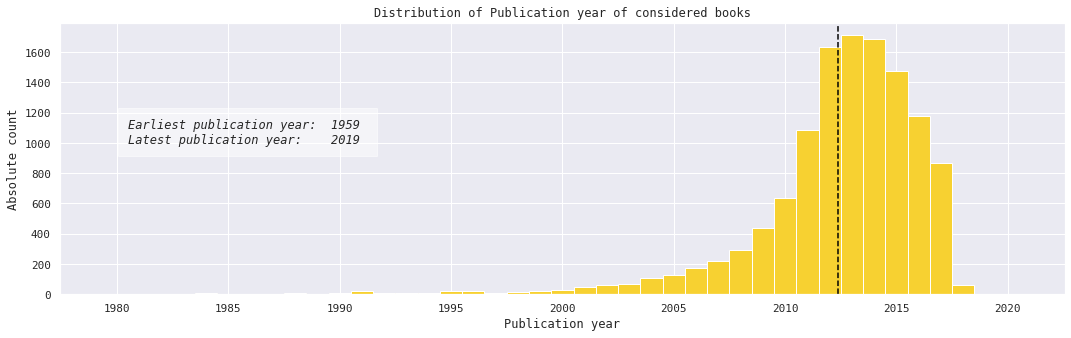

In [8]:
# Books over time
publication_years = book_data['publication_year']
bins = np.arange(1980, 2022)
plt.figure(figsize=(18, 5))
plt.hist(publication_years, bins=bins, align='left')
plt.axvline(np.mean(publication_years), color="black", linestyle="--")
plt.gca().xaxis.set_ticks(np.arange(1980, 2025, 5)) 
plt.title("Distribution of Publication year of considered books")
plt.xlabel("Publication year")
plt.ylabel("Absolute count")
plt.text(1980.5, 1000, 'Earliest publication year:  {0:.0f} \nLatest publication year:    {1:.0f}'.format(min(publication_years), max(publication_years)) , style='italic',
        bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10})
# plt.savefig(root_path + "plots/publication_year.pdf")
plt.show()

# Archetype by Gender

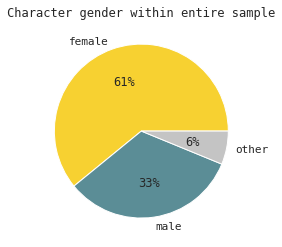

In [9]:
gender_distribution = [book_data.head(1000)[book_data.head(1000)['gender'] == gender].shape[0] for gender in genders]
plt.pie(gender_distribution, labels=genders, autopct='%.0f%%', colors=gender_palette)
plt.title("Character gender within entire sample")
# plt.savefig(root_path + "visuals/plots_gender.png", dpi=300)
plt.show()

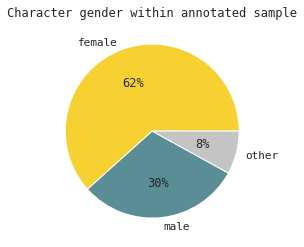

In [10]:
gender_distribution = [book_data[book_data['gender'] == gender].shape[0] for gender in genders]
plt.pie(gender_distribution, labels=genders, autopct='%.0f%%', colors=gender_palette)
plt.title("Character gender within annotated sample")
# plt.savefig(root_path + "plots/gender.pdf")
plt.show()

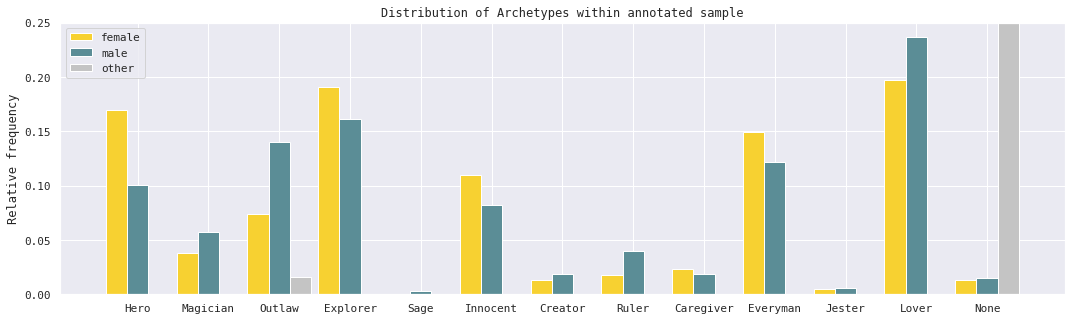

In [11]:
# Relative gender distribution by archetype
gender_distribution = [book_data.head(1000)[book_data.head(1000)['gender'] == gender].shape[0] for gender in genders]

X_axis = np.arange(len(archetypes))

df = book_data.groupby(['gender', 'archetype']).size()
plt.figure(figsize=(18, 5))
for idx, gender in enumerate(genders):
  archetypeCounts = df.loc[gender]

  # reorder archetypes to match other plots
  for archetype in archetypes: 
    if archetype not in archetypeCounts.index: archetypeCounts[archetype] = 0
  archetypeCounts = archetypeCounts.loc[archetypes]/gender_distribution[idx]
  
  plt.bar(X_axis - 0.3 * (1 - idx), archetypeCounts, 0.3, label=gender)
plt.legend()
plt.xticks(X_axis, archetypes)
plt.ylim(top=0.25)
plt.title("Distribution of Archetypes within annotated sample")
plt.ylabel("Relative frequency")
# plt.savefig(root_path + 'visuals/poster/archetype_distribution_gender', format='png', dpi=300)
plt.show()

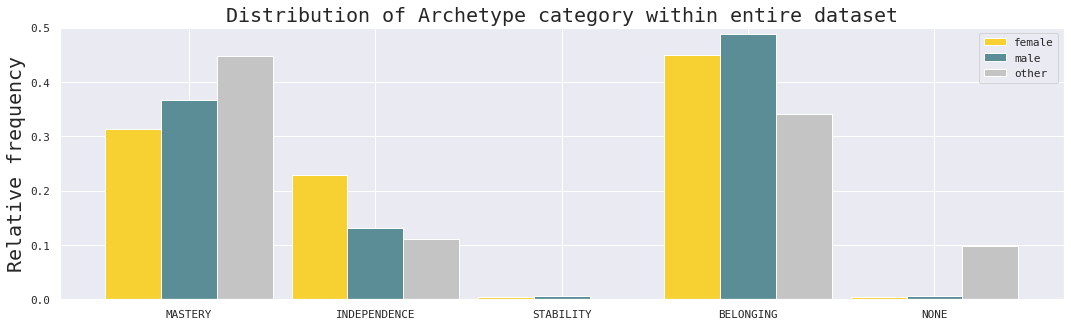

In [12]:
# Relative gender distribution by label
gender_distribution = [book_data[book_data['gender'] == gender].shape[0] for gender in genders]

X_axis = np.arange(len(labels))

df = book_data.groupby(['gender', 'label']).size()
plt.figure(figsize=(18, 5))
for idx, gender in enumerate(genders):
  labelCounts = df.loc[gender]

  # reorder archetypes to match other plots
  for label in labels: 
    if label not in labelCounts.index: labelCounts[label] = 0
  labelCounts = labelCounts.loc[labels]/gender_distribution[idx]
  
  plt.bar(X_axis - 0.3 * (1 - idx), labelCounts, 0.3, label=gender)
plt.legend()
plt.xticks(X_axis, labels)
plt.ylim(top=0.5)
plt.title("Distribution of Archetype category within entire dataset", fontsize=20)
plt.ylabel("Relative frequency", fontsize=20)
# plt.savefig(root_path + "visuals/poster/plots_genderdist.png", dpi=300)
plt.show()

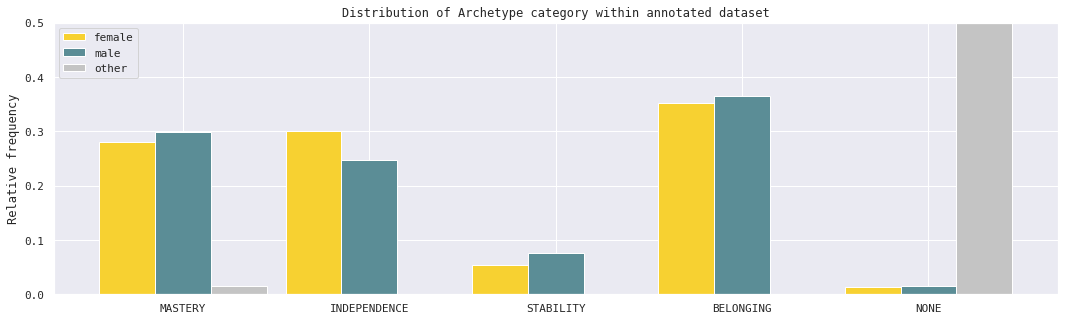

In [13]:
# Relative gender distribution by label
gender_distribution = [book_data.head(1000)[book_data.head(1000)['gender'] == gender].shape[0] for gender in genders]

X_axis = np.arange(len(labels))

df = book_data.head(1000).groupby(['gender', 'label']).size()
plt.figure(figsize=(18, 5))
for idx, gender in enumerate(genders):
  labelCounts = df.loc[gender]

  # reorder archetypes to match other plots
  for label in labels: 
    if label not in labelCounts.index: labelCounts[label] = 0
  labelCounts = labelCounts.loc[labels]/gender_distribution[idx]
  
  plt.bar(X_axis - 0.3 * (1 - idx), labelCounts, 0.3, label=gender)
plt.legend()
plt.xticks(X_axis, labels)
plt.ylim(top=0.5)
plt.title("Distribution of Archetype category within annotated dataset")
plt.ylabel("Relative frequency")
plt.show()

# Average ratings and popularity of archetypes

In [14]:
archetype_averages = book_data.head(1000).groupby(['archetype']).mean()
archetype_averages['archetype'] = archetype_averages.index

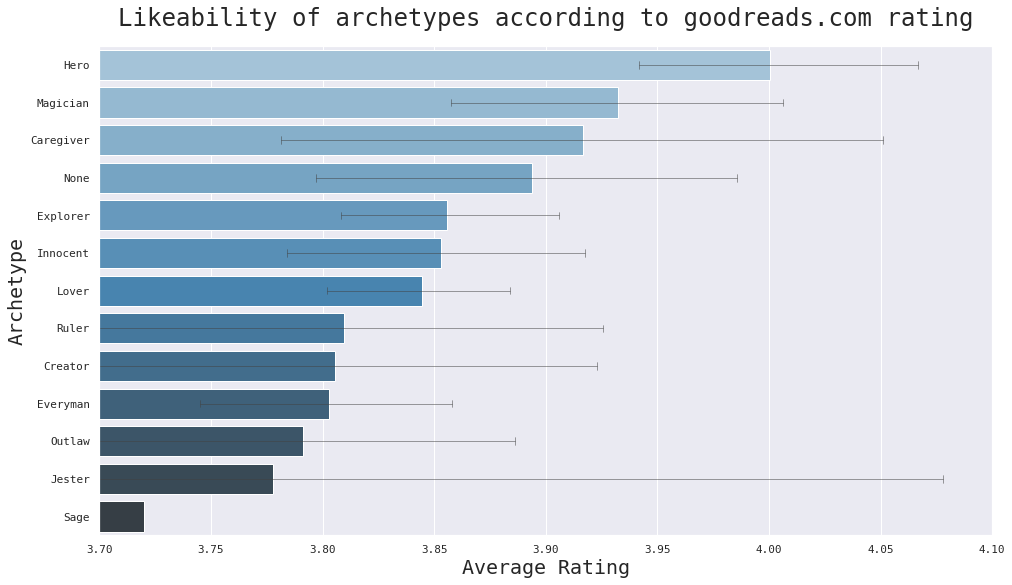

In [15]:
palette = sns.color_palette("Blues_d",n_colors=13)
# palette.reverse()

plt.figure(figsize=(16, 9))
ax = sns.barplot(x="average_rating", y="archetype", 
                 data=book_data.head(1000), 
                 palette=palette, 
                 order=archetype_averages.sort_values('average_rating', ascending=False).archetype,
                 capsize=.2,
                 ci=95,
                 errwidth=0.5)
ax.set_xlabel("Average Rating", fontsize = 20)
ax.set_ylabel("Archetype", fontsize = 20)
plt.xlim([3.7,4.1])
plt.title('Likeability of archetypes according to goodreads.com rating', fontsize=24, pad=20)
# plt.savefig(root_path + 'visuals/poster/archetype_likeability', format='png', dpi=300)
plt.show()

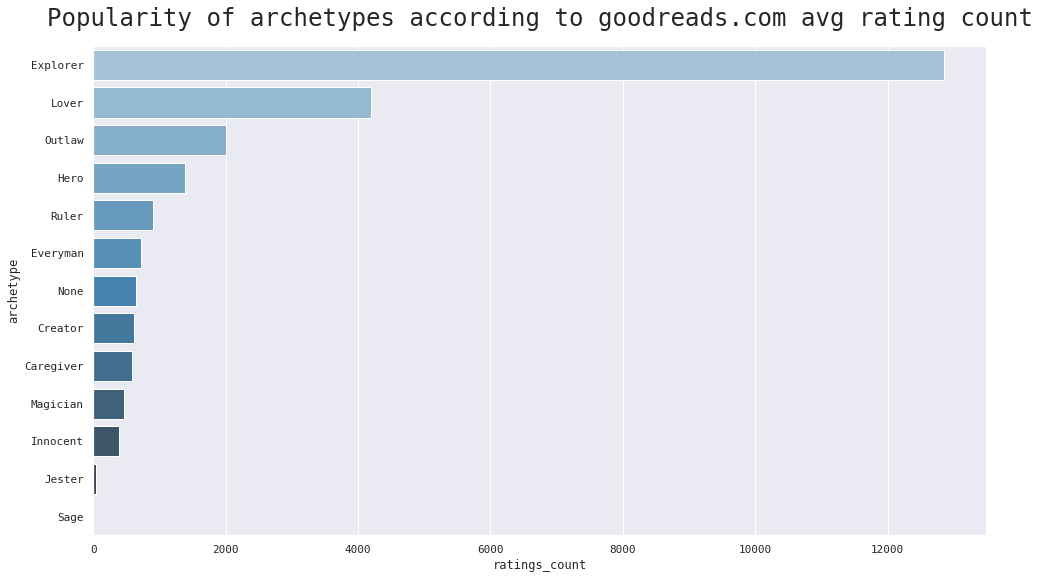

In [16]:
plt.figure(figsize=(16, 9))
ax = sns.barplot(x="ratings_count", y="archetype", 
                 data=archetype_data, 
                 palette=palette, 
                 order=archetype_averages.sort_values('ratings_count', ascending=False).archetype,
                 capsize=.2,
                 ci=None)
#plt.xlim([3.7,4.1])
plt.title('Popularity of archetypes according to goodreads.com avg rating count', fontsize=24, pad=20)
# plt.savefig(root_path + 'visuals/poster/archetype_popularity', format='png', dpi=300)
plt.show()

# Character gender and author gender

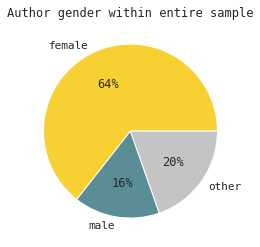

In [18]:
author_gender_distribution = [book_data[book_data['author_gender'] == gender].shape[0] for gender in genders]
plt.pie(author_gender_distribution, labels=genders, autopct='%.0f%%')
plt.title("Author gender within entire sample")
# plt.savefig(root_path + "visuals/plots/author_gender", format='png', dpi=300)
plt.show()

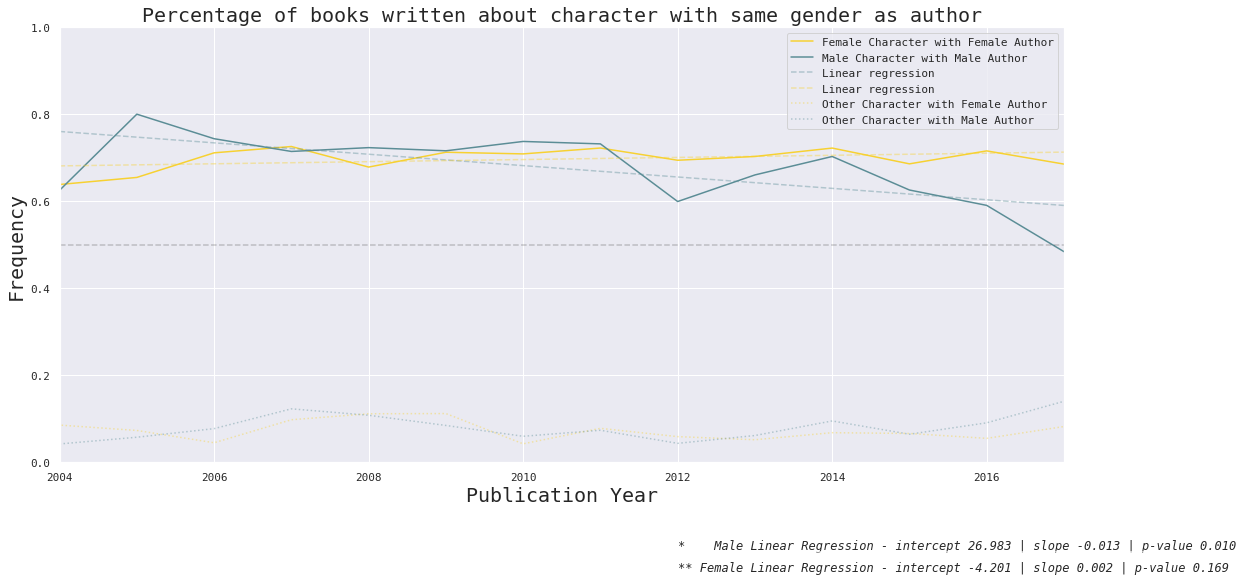

In [19]:
from scipy import stats

gender_frequencies = book_data.groupby(['author_gender', 'gender', 'publication_year']).size()
author_gender_distribution = book_data.groupby(['author_gender', 'publication_year']).size()

books_about_women_by_women = gender_frequencies.loc['female']['female'].divide(author_gender_distribution['female'])
books_about_men_by_women = gender_frequencies.loc['female']['male'].divide(author_gender_distribution['female'])
books_about_other_by_women = gender_frequencies.loc['female']['other'].divide(author_gender_distribution['female'])

books_about_women_by_men = gender_frequencies.loc['male']['female'].divide(author_gender_distribution['male'])
books_about_men_by_men = gender_frequencies.loc['male']['male'].divide(author_gender_distribution['male'])
books_about_other_by_men = gender_frequencies.loc['male']['other'].divide(author_gender_distribution['male'])

books_about_men_by_men = books_about_men_by_men.fillna(0)
books_about_men_by_men = books_about_men_by_men[(books_about_men_by_men.index >= 2004) & (books_about_men_by_men.index <=2017)]
res_male = stats.linregress(books_about_men_by_men.index, books_about_men_by_men.values)

books_about_women_by_women = books_about_women_by_women.fillna(0)
books_about_women_by_women = books_about_women_by_women[(books_about_women_by_women.index >= 2004) & (books_about_women_by_women.index <=2017)]
res_female = stats.linregress(books_about_women_by_women.index, books_about_women_by_women.values)

plt.figure(figsize=(18, 8))
plt.title("Percentage of books written about character with same gender as author", fontsize=20)

plt.plot(books_about_women_by_women, label="Female Character with Female Author", color=gender_colors[0], linestyle='solid')
# plt.plot(books_about_men_by_women, label="Male Character with Female Author", color='salmon', linestyle='dashed')
# plt.plot(books_about_women_by_men, label="Female Character with Male Author", color='blue', linestyle='solid')
plt.plot(books_about_men_by_men, label="Male Character with Male Author", color=gender_colors[1], linestyle='solid')

plt.plot(books_about_men_by_men.index, res_male.intercept + res_male.slope*books_about_men_by_men.index, color=gender_colors[1], label='Linear regression', alpha=0.4, linestyle='dashed')
plt.plot(books_about_women_by_women.index, res_female.intercept + res_female.slope*books_about_women_by_women.index, color=gender_colors[0], label='Linear regression', alpha=0.4, linestyle='dashed')

plt.plot(books_about_other_by_women, label="Other Character with Female Author", color=gender_colors[0], linestyle='dotted', alpha=0.4)
plt.plot(books_about_other_by_men, label="Other Character with Male Author", color=gender_colors[1], linestyle='dotted', alpha=0.4)

plt.axhline(0.5, linestyle='dashed', color='black', alpha=0.2)

plt.text(2012, -0.2, '*    Male Linear Regression - intercept {0:.3f} | slope {1:.3f} | p-value {2:.3f}'.format(res_male.intercept, res_male.slope, res_male.pvalue) , style='italic',
        bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10})

plt.text(2012, -0.25, '** Female Linear Regression - intercept {0:.3f} | slope {1:.3f} | p-value {2:.3f}'.format(res_female.intercept, res_female.slope, res_female.pvalue) , style='italic',
        bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10})

plt.xlabel("Publication Year", fontsize=20)
plt.xlim(2004, 2017)
plt.ylim(0,1)
plt.ylabel("Frequency", fontsize=20)
plt.legend(loc='best')
# plt.savefig(root_path + 'visuals/author_character_gender', format='png', dpi=300)
plt.show()

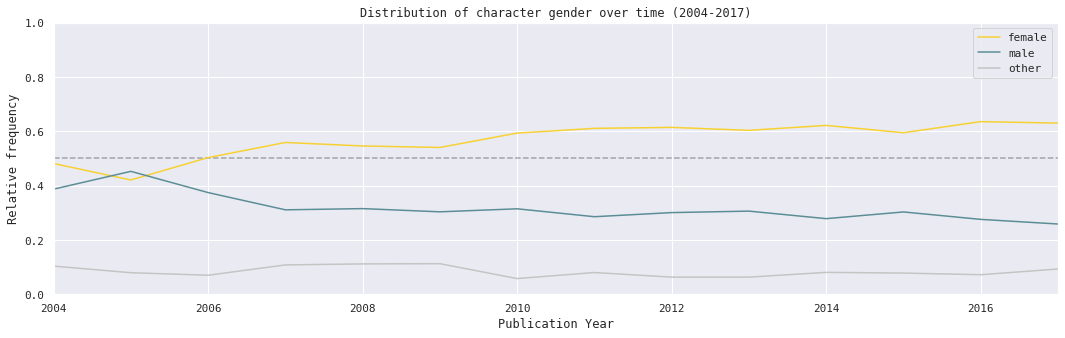

In [20]:
# Gender distribution over time
df = book_data.groupby(['gender', 'publication_year']).size()
plt.figure(figsize=(18, 5))
plt.title("Distribution of character gender over time (2004-2017)")

overall_count = book_data.groupby(['publication_year']).size()

plt.axhline(0.5, linestyle='dashed', color='black', alpha=0.3)

for gender in genders:
  yearCounts = df.loc[gender].divide(overall_count).fillna(0)
  yearCounts.plot(legend=True, label=gender, xlabel="Publication Year", ylabel="Relative frequency")

plt.axis([2004, 2017, 0, 1])
# plt.savefig(root_path + 'visuals/poster/character_gender', format='png', dpi=300)
plt.show()

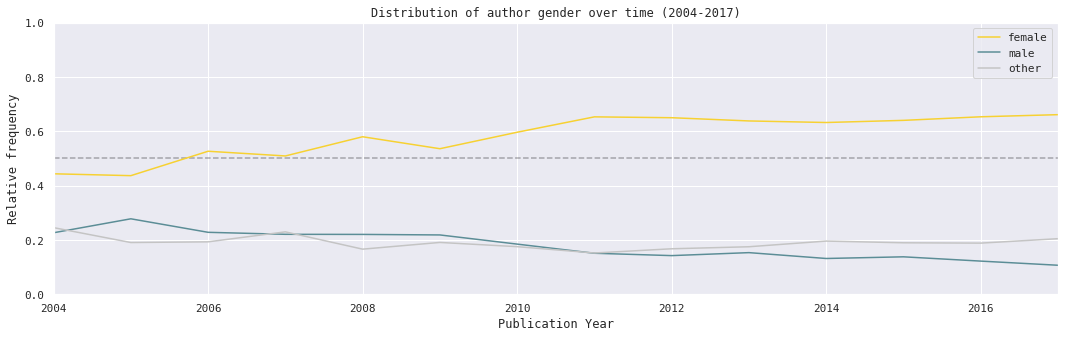

In [21]:
# Author Gender distribution over time
df = book_data.groupby(['author_gender', 'publication_year']).size()
plt.figure(figsize=(18, 5))
plt.title("Distribution of author gender over time (2004-2017)")

overall_count = book_data.groupby(['publication_year']).size()

plt.axhline(0.5, linestyle='dashed', color='black', alpha=0.3)

for gender in genders:
  yearCounts = df.loc[gender].divide(overall_count).fillna(0)
  yearCounts.plot(legend=True, label=gender, xlabel="Publication Year", ylabel="Relative frequency")

plt.axis([2004, 2017, 0, 1])
# plt.savefig(root_path + 'visuals/poster/author_gender', format='png', dpi=300)
plt.show()

# Archetype and publisher

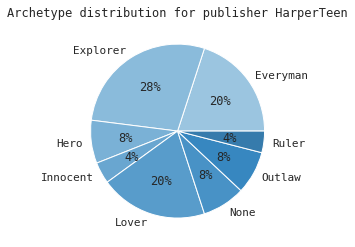

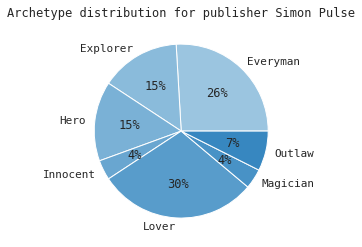

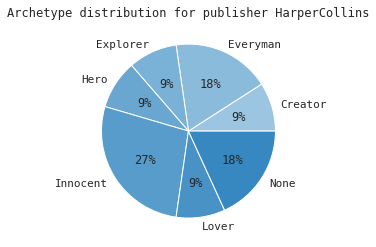

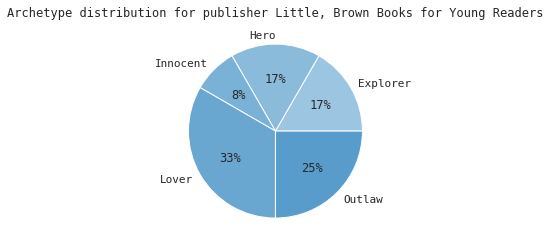

In [22]:
palette = sns.color_palette("Blues_d",n_colors=13)
sns.set_palette(palette)
top_4_publishers = book_data.groupby(['publisher']).size().nlargest(4).index
for publisher in top_4_publishers:
  archetype_counts = book_data.loc[book_data['publisher'] == publisher].groupby('archetype').size()
  plt.title("Archetype distribution for publisher " + publisher)
  plt.pie(archetype_counts, labels=archetype_counts.index, autopct='%.0f%%')
  # plt.savefig(root_path + "visuals/plots_" + publisher, dpi=300, format='png')
  plt.show()

# Character data analysis

In [23]:
character_data = pd.read_csv(root_path + 'final_data/character_data.csv', index_col=0)
character_data

,text,first_name,last_name,gender,archetype,label,count,max_proper_mention,poss,agent,patient,mod
3465100,*Winner 2010 White Pine Award\n*Shortlisted fo...,Bean,NaN,female,Explorer,INDEPENDENCE,64,Bean,"[('life', 4), ('mom', 4), ('father', 2), ('ste...","[('gets', 3), ('had', 3), ('tries', 2), ('real...","[('keeps', 1), ('messed', 1), ('marries', 1)]","[('young', 1), ('inspiration', 1)]"
25183888,Sometimes danger is hard to see... until it's ...,Britt,Pfeiffer,female,Lover,BELONGING,17,Britt,"[('worship', 1)]","[('trained', 2), ('wants', 2), ('explore', 2),...","[('confusing', 2)]",[]
28449727,Star Wars meets Romeo and Juliet in this epic ...,Episode,NaN,other,None,NONE,0,NaN,NaN,NaN,NaN,NaN
16372746,It happened like this. I was stolen from an ai...,Gemma,NaN,female,Innocent,INDEPENDENCE,3,Gemma,[],"[('love', 1), ('written', 1)]","[('kidnapped', 1)]",[]
32574781,How can you hate someone in the present and lo...,Fliss,NaN,female,Explorer,INDEPENDENCE,82,Fliss,"[('grandmother', 7), ('mum', 2), ('school', 2)...","[('discovers', 4), ('found', 2), ('unearths', ...","[('like', 1), ('liking', 1), ('found', 1), ('j...","[('selfless', 1), ('fitting', 1), ('brat', 1),..."
...,...,...,...,...,...,...,...,...,...,...,...,...
11962848,A story about a wounded girl and the boy who w...,Louise,Terrace,female,Everyman,BELONGING,181,Louise,"[('friend', 8), ('grandparents', 8), ('mother'...","[('has', 5), ('used', 3), ('lives', 3), ('conf...","[('know', 2), ('likes', 2), ('holding', 1), ('...","[('short', 3), ('fun', 2), ('character', 2), (..."
34064600,Nik Gustafsson has a secret: He's not really N...,Nik,Gustafsson,male,Lover,BELONGING,30,Nik,"[('wealth', 2), ('life', 1), ('name', 1), ('ac...","[('has', 2), ('gets', 2), ('turns', 2), ('hidi...","[('suffocating', 1), ('hates', 1), ('liked', 1...","[('spy', 1), ('crazy', 1), ('son', 1), ('heir'..."
7041456,"Nikki Donovan, Demon Princess, is back - and s...",Nikki,Donovan,female,Lover,BELONGING,161,Nikki,"[('life', 8), ('father', 6), ('friend', 5), ('...","[('going', 5), ('gets', 4), ('has', 4), ('disc...","[('allowed', 2), ('called', 1), ('loves', 1), ...","[('princess', 3), ('bent', 1), ('girl', 1), ('..."
18501782,"Cameron Winters is a freak. Fortunately, no on...",Cameron,Winters,female,Magician,MASTERY,127,Cameron,"[('grandmother', 6), ('abilities', 5), ('power...","[('has', 5), ('finds', 2), ('have', 2), ('trie...","[('keep', 2), ('train', 2), ('trained', 2), ('...","[('reader', 2), ('about', 2), ('freak', 1), ('..."


In [24]:
def transform_str_to_array(array_str):
  if array_str == '[]':
    return []
  if isinstance(array_str, str):
    return eval(array_str)
  return np.nan

character_data['poss'] = [transform_str_to_array(x) for x in character_data['poss']]
character_data['agent'] = [transform_str_to_array(x) for x in character_data['agent']]
character_data['mod'] = [transform_str_to_array(x) for x in character_data['mod']]
character_data['patient'] = [transform_str_to_array(x) for x in character_data['patient']]

In [25]:
archetype_data = character_data.groupby(by='archetype').agg({'poss': 'sum', 'agent': 'sum', 'mod': 'sum', 'patient': 'sum'})

In [26]:
from collections import defaultdict

def get_association_dict(association_count):
  if len(association_count) > 0:
    associations, counts = zip(*association_count)
    association_dict = defaultdict(int)
    for idx, association in enumerate(associations):
        association_dict[association] += counts[idx]

    association_dict = dict(sorted(association_dict.items(), key=lambda item: item[1], reverse=True))
    return association_dict
  else: return {}

archetype_data['poss'] = [get_association_dict(x) for x in archetype_data['poss']]
archetype_data['agent'] = [get_association_dict(x) for x in archetype_data['agent']]
archetype_data['mod'] = [get_association_dict(x) for x in archetype_data['mod']]
archetype_data['patient'] = [get_association_dict(x) for x in archetype_data['patient']]
archetype_data

,poss,agent,mod,patient
archetype,,,,
Caregiver,"{'mother': 34, 'life': 28, 'father': 19, 'sist...","{'has': 16, 'finds': 16, 'had': 10, 'get': 6, ...","{'character': 6, 'girl': 3, 'strong': 3, 'good...","{'blames': 6, 'finds': 5, 'told': 4, 'love': 4..."
Creator,"{'friend': 12, 'life': 10, 'friends': 8, 'pain...","{'has': 15, 'knows': 7, 'finds': 6, 'decides':...","{'girl': 5, 'character': 3, 'willing': 3, 'chi...","{'born': 4, 'forced': 4, 'turned': 2, 'dump': ..."
Everyman,"{'life': 131, 'friend': 77, 'father': 77, 'mot...","{'has': 125, 'wants': 57, 'had': 33, 'have': 3...","{'character': 35, 'girl': 30, 'happy': 9, 'per...","{'loved': 17, 'liked': 14, 'see': 11, 'love': ..."
Explorer,"{'life': 157, 'father': 132, 'mother': 104, 'f...","{'has': 155, 'had': 62, 'finds': 54, 'knows': ...","{'character': 38, 'girl': 19, 'determined': 12...","{'forced': 13, 'loved': 12, 'kill': 12, 'caugh..."
Hero,"{'life': 76, 'father': 72, 'friends': 61, 'fam...","{'has': 109, 'knows': 49, 'finds': 35, 'have':...","{'character': 27, 'girl': 17, 'strong': 15, 'a...","{'liked': 15, 'forced': 13, 'kill': 12, 'loved..."
Innocent,"{'life': 64, 'father': 61, 'mother': 58, 'pare...","{'has': 51, 'had': 24, 'wants': 23, 'finds': 1...","{'girl': 14, 'character': 10, 'able': 9, 'sure...","{'loved': 9, 'help': 7, 'keep': 7, 'left': 7, ..."
Jester,"{'stories': 2, 'roommate': 1, 'wand': 1, 'ment...","{'feels': 2, 'learns': 2, 'make': 1, 'sets': 1...","{'one': 1, 'funny': 1, 'smart': 1, 'character'...","{'avoiding': 1, 'wish': 1, 'insert': 1, 'follo..."
Lover,"{'life': 165, 'father': 95, 'friend': 89, 'fam...","{'has': 133, 'finds': 68, 'knows': 58, 'wants'...","{'character': 35, 'girl': 21, 'able': 16, 'sma...","{'liked': 21, 'loved': 18, 'like': 18, 'love':..."
Magician,"{'life': 36, 'grandfather': 18, 'friend': 17, ...","{'has': 53, 'knows': 12, 'wants': 12, 'finds':...","{'sure': 6, 'character': 6, 'able': 5, 'girl':...","{'loved': 7, 'save': 6, 'love': 6, 'liked': 5,..."


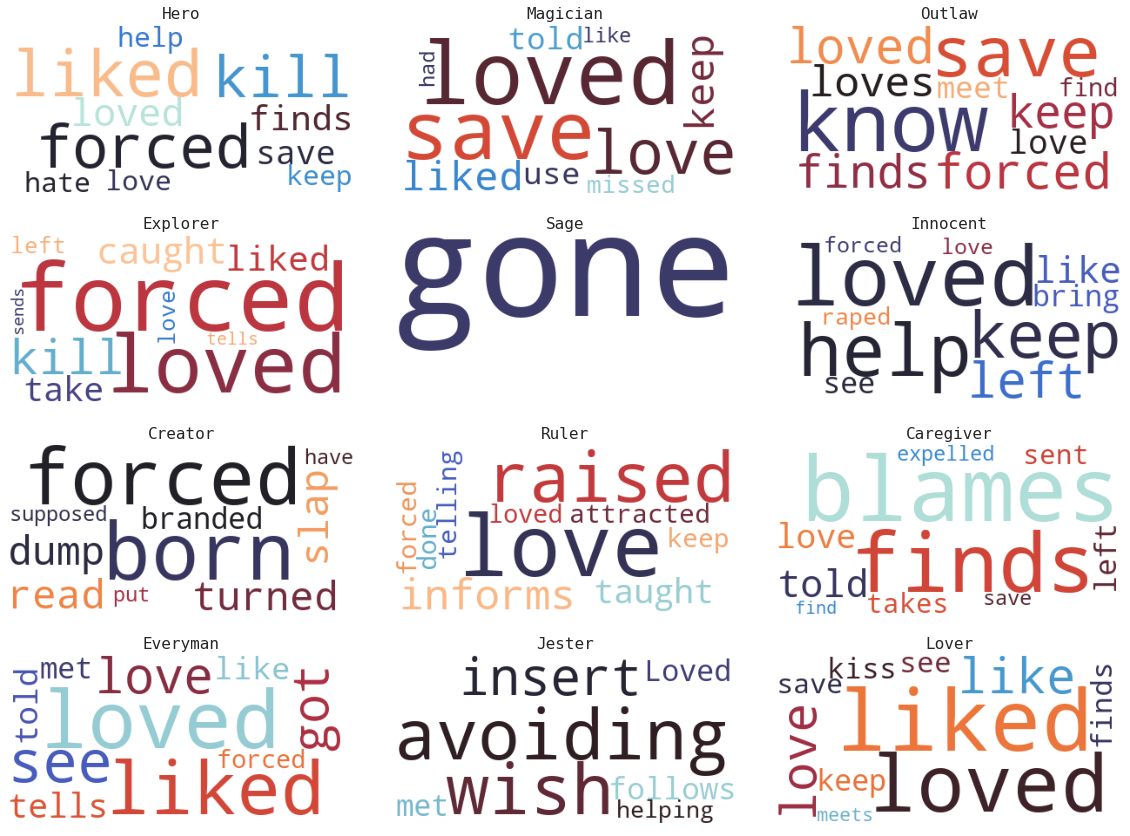

In [28]:
from mpl_toolkits.axes_grid1 import ImageGrid
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

target = 'patient'
# Targets = 'poss', 'agent', 'mod', 'patient'

word_clouds = []
for target_dict in archetype_data[target]:
  if len(target_dict) == 0:
    target_dict = {'NaN': 1}

  wc = WordCloud(background_color='white', max_words=10, stopwords=stopwords, colormap="icefire").generate_from_frequencies(target_dict)
  word_clouds.append(wc)

fig = plt.figure(figsize=(20., 20.))
grid = ImageGrid(fig, 111, 
                 nrows_ncols=(4, 3),  # creates 2x2 grid of axes
                 axes_pad=0.5,  # pad between axes
                 )

for idx, wc in enumerate(word_clouds):
  archetype = archetype_data.index[idx]
  if archetype != 'None':
    ax = grid[archetypes.index(archetype)]
    ax.set_title(archetype, {'fontsize':16})
    ax.imshow(wc)
    ax.grid('off')
    ax.axis('off')

# plt.savefig(root_path + 'visuals/archetype_' + target, dpi=300, format='png')
plt.show()